# Asset Data

In [1]:
import ast
import numpy as np
import pandas as pd
from warnings import filterwarnings
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl
from pprint import pprint

from src.contract_export import contract_query
from config import CONTRACT_ADDRESSES, NODE_LCD_URLS

filterwarnings('ignore')
tqdm.pandas()

## load data

In [2]:
assets_df = pd.read_csv('data_csv/all_assets.csv', index_col=0)
assets_df['channels'] = assets_df.channels.map(lambda x: ast.literal_eval(x) if type(x) == str else None)
assets_df['denom_units'] = assets_df.denom_units.map(
    lambda x: ast.literal_eval(x) if type(x) == str else None)
assets_df

,chain_name,chain_id,denom,type_asset,supply,description,denom_units,display,name,symbol,...,denom_base,type_asset_base,path,channels,chain_id_counterparty,channel_id_counterparty,supply_base,chain_id_base,one_channel,admin
0,realio,realionetwork_3301-1,ibc/ED07A3391A112B175915CD8FAF43A2DA8E4790EDE1...,ics20,1000,The native token of Osmosis,"[{'denom': 'uosmo', 'exponent': 0, 'aliases': ...",osmo,NaN,NaN,...,uosmo,sdk.coin,transfer/channel-0,[channel-0],osmosis-1,channel-1011,605276664611957,osmosis-1,True,NaN
1,loyal,loyal-main-02,ibc/0471F1C4E7AFD3F07702BEF6DC365268D64570F7C1...,ics20,100000,NaN,None,NaN,NaN,NaN,...,uosmo,sdk.coin,transfer/channel-1,[channel-1],osmo-test-4,channel-2463,NaN,NaN,True,NaN
2,loyal,loyal-main-02,ibc/C0E66D1C81D8AAF0E6896E05190FDFBC222367148F...,ics20,1000000,NaN,None,NaN,NaN,NaN,...,uaxl,sdk.coin,transfer/channel-2,[channel-2],axelar-testnet-lisbon-3,channel-165,NaN,NaN,True,NaN
3,xpla,dimension_37-1,ibc/2CC0B1B7A981ACC74854717F221008484603BB8360...,ics20,600098,NaN,None,NaN,NaN,NaN,...,uaxl,sdk.coin,transfer/channel-0,[channel-0],axelar-dojo-1,channel-49,1076502807145169,axelar-dojo-1,True,NaN
4,xpla,dimension_37-1,ibc/6771714762A6F8F541DE7C461F09C68F310621315F...,ics20,93300000000000000,NaN,None,NaN,NaN,NaN,...,wavax-wei,sdk.coin,transfer/channel-0,[channel-0],axelar-dojo-1,channel-49,11859121968723491769117,axelar-dojo-1,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11411,terra2,phoenix-1,cw20:terra1x62mjnme4y0rdnag3r8rfgjuutsqlkkyuh4...,cw20,132230954536554,NaN,"[{'denom': 'xastro', 'exponent': 6, 'aliases':...",NaN,Staked Astroport,xASTRO,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
11412,terra2,phoenix-1,cw20:terra17gck626vgax9jpe6utm7dhx4vdzawfkt0jh...,cw20,93000000000000,NaN,"[{'denom': 'dust', 'exponent': 6, 'aliases': [...",NaN,Depegged UST,dUST,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
11413,terra2,phoenix-1,cw20:terra1xzkel96e5e8vfmqw7valzdzzv9hqasfyslc...,cw20,6564511713902,NaN,"[{'denom': 'local', 'exponent': 6, 'aliases': ...",NaN,Local Terra Token (Wormhole),LOCAL,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
11414,terra2,phoenix-1,cw20:terra1xp9hrhthzddnl7j5du83gqqr4wmdjm5t0gu...,cw20,100000000000000,NaN,"[{'denom': 'sayve', 'exponent': 6, 'aliases': ...",NaN,Sayve Token,SAYVE,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN


## charts

In [3]:
def aggregate_pie_plot(assets_df: pd.DataFrame, agg_column: str, n: int = 8, object_name: str = 'items') -> pd.Series:
    assets_by_item_row = assets_df.groupby(agg_column)['denom'].agg(np.count_nonzero).sort_values(ascending=False)
    assets_by_item = assets_by_item_row.head(n)
    if len(assets_by_item_row) > n:
        assets_by_item[f'remaining {len(assets_by_item_row) - n} {object_name}'] = sum(assets_by_item_row[n:])
    return assets_by_item

In [4]:
assets_by_chain = aggregate_pie_plot(assets_df=assets_df, agg_column='chain_name', object_name='chains\n', n=7)
assets_by_type_asset = aggregate_pie_plot(assets_df=assets_df, agg_column='type_asset')
assets_by_denom_base = aggregate_pie_plot(assets_df=assets_df, agg_column='denom_base', object_name='base denoms\n', n=7)
total_assets = len(assets_df)

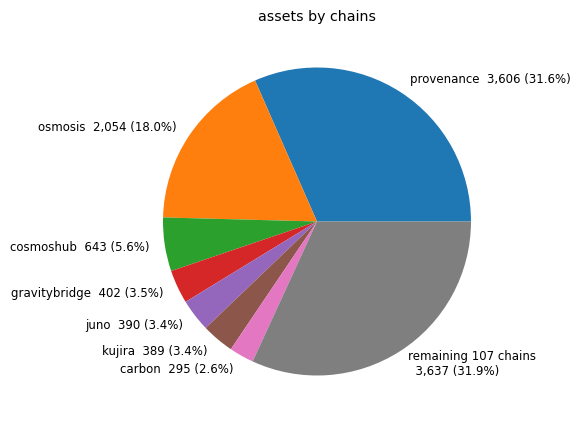

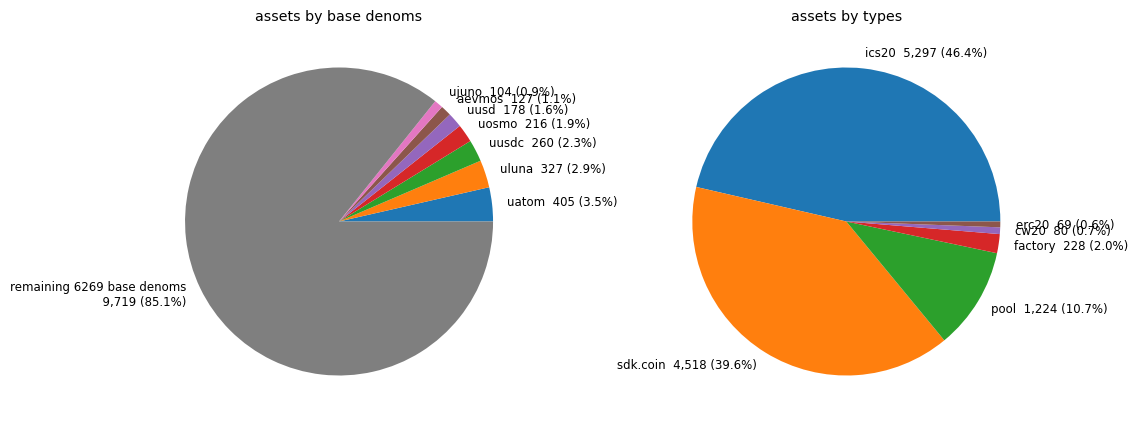

In [5]:
chain_labels = [f'{_chain_name}  {assets_by_chain[_chain_name]:>,.0f} ({assets_by_chain[_chain_name] / total_assets:.1%})'
                for _chain_name in assets_by_chain.keys()]
type_asset_labels = [f'{_type_asset}  {assets_by_type_asset[_type_asset]:>,.0f} ({assets_by_type_asset[_type_asset] / total_assets:.1%})'
                     for _type_asset in assets_by_type_asset.keys()]
denom_base_labels = [f'{_denom_base}  {assets_by_denom_base[_denom_base]:>,.0f} ({assets_by_denom_base[_denom_base] / total_assets:.1%})'
                     for _denom_base in assets_by_denom_base.keys()]

plt.rcParams.update({'font.size': 8.5})

mpl.rcParams['figure.figsize'] = (7.0, 5.0)
fig1, ax1 = plt.subplots(ncols=1, nrows=1)
ax1.pie(assets_by_chain, labels=chain_labels)
ax1.set_title(label='assets by chains')
fig1.savefig('src/img/chart__assets_by_chains.png')

mpl.rcParams['figure.figsize'] = (12.0, 5.0)
fig2, [ax3, ax2] = plt.subplots(ncols=2, nrows=1)
ax2.pie(assets_by_type_asset, labels=type_asset_labels)
ax2.set_title(label='assets by types')
ax3.pie(assets_by_denom_base, labels=denom_base_labels)
ax3.set_title(label='assets by base denoms')
fig2.savefig('src/img/chart__assets_by_base_denoms_and_types.png')

plt.show()

## contract query

In [6]:
CONTRACT_CHAIN = 'bostrom'

pprint(
    contract_query(
        query={'get_chain': {'chain_name': 'bostrom'}},
        contract_address=CONTRACT_ADDRESSES[CONTRACT_CHAIN],
        node_lcd_url=NODE_LCD_URLS[CONTRACT_CHAIN]
    )
)

{'data': {'assets': [{'address': None,
                      'admin': None,
                      'base': 'boot',
                      'chain_id': 'bostrom',
                      'chain_name': 'bostrom',
                      'coingecko_id': None,
                      'denom_units': [{'aliases': ['BOOT'],
                                       'denom': 'boot',
                                       'exponent': 0}],
                      'description': 'The staking token of Bostrom',
                      'display': 'boot',
                      'ibc': None,
                      'images': None,
                      'keywords': None,
                      'logo_uris': None,
                      'name': 'Bostrom Boot',
                      'supply': '1155528957575158',
                      'symbol': 'BOOT',
                      'traces': None,
                      'type_asset': 'sdk.coin'},
                     {'address': None,
                      'admin': None,
             

In [7]:
pprint(
    contract_query(
        query={'get_all_assets': {'limit': 5}},
        contract_address=CONTRACT_ADDRESSES[CONTRACT_CHAIN],
        node_lcd_url=NODE_LCD_URLS[CONTRACT_CHAIN]
    )
)

{'data': {'entries': [{'address': None,
                       'admin': None,
                       'base': 'ibc/4A3AAD07BC4EBEBC10FC2560EAA3B7A1D3B541B5264ED8E5E13E6B74AC76127B',
                       'chain_id': 'eightball-1',
                       'chain_name': '8ball',
                       'coingecko_id': None,
                       'denom_units': [{'aliases': [],
                                        'denom': 'uosmo',
                                        'exponent': 0},
                                       {'aliases': [],
                                        'denom': 'osmo',
                                        'exponent': 6}],
                       'description': 'The native token of Osmosis',
                       'display': 'osmo',
                       'ibc': {'base_supply': None,
                               'dst_channel': 'channel-641',
                               'source_channel': 'channel-16',
                               'source_denom': 'uosmo

In [8]:
pprint(
    contract_query(
        query={'get_asset': {'chain_name': 'osmosis', 'base': 'uosmo'}},
        contract_address=CONTRACT_ADDRESSES[CONTRACT_CHAIN],
        node_lcd_url=NODE_LCD_URLS[CONTRACT_CHAIN]
    )
)

{'data': {'asset': {'address': None,
                    'admin': None,
                    'base': 'uosmo',
                    'chain_id': 'osmosis-1',
                    'chain_name': 'osmosis',
                    'coingecko_id': None,
                    'denom_units': [{'aliases': [],
                                     'denom': 'uosmo',
                                     'exponent': 0},
                                    {'aliases': [],
                                     'denom': 'osmo',
                                     'exponent': 6}],
                    'description': 'The native token of Osmosis',
                    'display': 'osmo',
                    'ibc': None,
                    'images': None,
                    'keywords': None,
                    'logo_uris': None,
                    'name': None,
                    'supply': '606555203424697',
                    'symbol': None,
                    'traces': None,
                    'type_asset':